# Introduction

The goal of this analysis is to reconstruct remote sensing bands (specifically Bands 4, 5, and 6) using a machine learning algorithms and subsequently detect anomalies in the reconstructed bands. The dataset used is the 'Processed_Assen_RS_data.csv,' containing information on various bands and their corresponding geographical coordinates.

# Load the dataset

In [1]:
#Import Dataset
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns                                     
import matplotlib.pyplot as plt                           
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
assen_data = pd.read_csv('Processed_Assen_RS_data.csv')

size = (172, 284)
assen_data

Unnamed: 0  Longitude   Latitude  Band1  Band2  Band3  Band4  Band5  \
0               0  27.564250 -25.105965    188    227    363    406    750   
1               1  27.564548 -25.105963    126    144    215    166    917   
2               2  27.564845 -25.105962    141    187    421    310   2263   
3               3  27.565143 -25.105961    111    170    402    291   2558   
4               4  27.565440 -25.105960    232    365    658    779   2409   
...           ...        ...        ...    ...    ...    ...    ...    ...   
48843       48843  27.647507 -25.151951    381    449    677    884   1931   
48844       48844  27.647804 -25.151950    408    483    720    996   1840   
48845       48845  27.648102 -25.151949    364    414    584    796   1464   
48846       48846  27.648399 -25.151947    387    415    565    745   1389   
48847       48847  27.648697 -25.151946    416    435    578    719   1445   

       Band6  Band7  
0        709    440  
1        479    232  
2        947    438  
3       1154    562  
4       2199   1319  
...      ...    ...  
48843   2451   1749  
48844   2544   2068  
48845   2274   2039  
48846   2199   1867  
48847   2133   1718  

[48848 rows x 10 columns]

# Data Overview

The dataset was loaded and visualized to understand the distribution of values in Bands 1-7. Initial exploration involved boxplots, revealing the spread and central tendency of each band.

In [3]:
#Visualize the distribution of values 
assen_data[['Band1', 'Band2', 'Band3', 'Band4', 'Band5', 'Band6', 'Band7']].boxplot()
plt.title('Distribution of Bands 1-7')
plt.show()

In [4]:
#machine learning workflow to reconstruct bands 4, 5, 6 and extract the residuals

#Extract the original bands for reconstruction
original_bands = assen_data[['Band1', 'Band2', 'Band3', 'Band7']]
original_bands

Band1  Band2  Band3  Band7
0        188    227    363    440
1        126    144    215    232
2        141    187    421    438
3        111    170    402    562
4        232    365    658   1319
...      ...    ...    ...    ...
48843    381    449    677   1749
48844    408    483    720   2068
48845    364    414    584   2039
48846    387    415    565   1867
48847    416    435    578   1718

[48848 rows x 4 columns]

# Data Preprocessing

The dataset was transformed using MinMaxScaler method. Principal Component Analysis (PCA) was then applied to the scaled original bands, leading to the reconstruction of Bands 4, 5, and 6. Residuals, representing the difference between original and reconstructed bands, were calculated and added to the dataset.

In [5]:
#Data transformations 
scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(original_bands)
X_scaled

array([[0.19421488, 0.14878269, 0.12700297, 0.11060209],
       [0.13016529, 0.07394049, 0.03916914, 0.04253927],
       [0.14566116, 0.11271416, 0.16142433, 0.10994764],
       ...,
       [0.37603306, 0.31740307, 0.25816024, 0.63383508],
       [0.39979339, 0.31830478, 0.24688427, 0.57755236],
       [0.42975207, 0.33633904, 0.25459941, 0.52879581]])

# Principal Component Analysis (PCA)

PCA was employed to extract Principal Components (PC1, PC2, and PC3). The scores were visualized, showcasing spatial patterns across the geographical area.

In [6]:
#Perform PCA transformation 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
reconstructed_bands = pca.fit_transform(X_scaled)
reconstructed_bands

array([[-2.68800801e-01,  8.50547377e-02,  5.93387388e-02],
       [-4.10666105e-01,  4.29641396e-02,  7.05906849e-02],
       [-2.94405703e-01,  8.52964396e-02, -2.99882558e-03],
       ...,
       [ 2.88294504e-01, -1.11333483e-01,  1.82117445e-04],
       [ 2.57735429e-01, -7.55428005e-02,  3.98717647e-02],
       [ 2.50024215e-01, -2.62443416e-02,  7.36755007e-02]])

In [7]:
#Calculate residuals (difference between original and reconstructed bands)
residuals = X_scaled - pca.inverse_transform(reconstructed_bands)
residuals

array([[ 2.17478336e-03, -3.42662311e-03,  1.69644538e-03,
        -1.31601655e-04],
       [-3.95211423e-04,  6.22701377e-04, -3.08285691e-04,
         2.39152452e-05],
       [ 1.07630628e-02, -1.69584522e-02,  8.39575492e-03,
        -6.51300216e-04],
       ...,
       [-1.05263631e-03,  1.65855044e-03, -8.21111671e-04,
         6.36976917e-05],
       [ 3.08674007e-03, -4.86351654e-03,  2.40781956e-03,
        -1.86786467e-04],
       [ 5.65400327e-03, -8.90853711e-03,  4.41041986e-03,
        -3.42138073e-04]])

In [8]:
#Add residuals to the dataset
assen_data['Residual4'] = residuals[:, 0]
assen_data['Residual5'] = residuals[:, 1]
assen_data['Residual6'] = residuals[:, 2]

In [9]:
#Split the data into features (X) and residuals for each band
X = X_scaled
y_residuals4 = residuals[:, 0]
y_residuals5 = residuals[:, 1]
y_residuals6 = residuals[:, 2]

# Machine Learning for residual prediction

Random Forest regressors were trained to predict residuals for Bands 4, 5, and 6. The predicted residuals were then added to the original bands to obtain the reconstructed bands.

In [10]:
#Train a Random Forest regressor for each band to predict residuals
regressor4 = RandomForestRegressor(n_estimators=100, random_state=42)
regressor4.fit(X, y_residuals4)

RandomForestRegressor(random_state=42)

In [11]:
regressor5 = RandomForestRegressor(n_estimators=100, random_state=42)
regressor5.fit(X, y_residuals5)

RandomForestRegressor(random_state=42)

In [12]:
regressor6 = RandomForestRegressor(n_estimators=100, random_state=42)
regressor6.fit(X, y_residuals6)

RandomForestRegressor(random_state=42)

In [13]:
#Make predictions on the entire dataset for each band
assen_data['PredictedResidual4'] = regressor4.predict(X)
assen_data['PredictedResidual5'] = regressor5.predict(X)
assen_data['PredictedResidual6'] = regressor6.predict(X)

In [14]:
#Reshape PredictedResidual4, PredictedResidual5, PredictedResidual6
predicted_residual4 = assen_data['PredictedResidual4'].values.reshape(-1, 1)
predicted_residual5 = assen_data['PredictedResidual5'].values.reshape(-1, 1)
predicted_residual6 = assen_data['PredictedResidual6'].values.reshape(-1, 1)

#Check shapes before adding
print('Original Band4 shape:', assen_data['Band4'].shape)
print('PredictedResidual4 shape:', predicted_residual4.shape)

#Add the original bands with the reshaped predicted residuals
assen_data['ReconstructedBand4'] = assen_data['Band4'].values + predicted_residual4.flatten()
assen_data['ReconstructedBand5'] = assen_data['Band5'].values + predicted_residual5.flatten()
assen_data['ReconstructedBand6'] = assen_data['Band6'].values + predicted_residual6.flatten()

#Check shapes after adding
print('ReconstructedBand4 shape:', assen_data['ReconstructedBand4'].shape)
print('ReconstructedBand5 shape:', assen_data['ReconstructedBand5'].shape)
print('ReconstructedBand6 shape:', assen_data['ReconstructedBand6'].shape)

Original Band4 shape: (48848,)
PredictedResidual4 shape: (48848, 1)
ReconstructedBand4 shape: (48848,)
ReconstructedBand5 shape: (48848,)
ReconstructedBand6 shape: (48848,)


In [15]:
#Visualize the distribution of residuals
assen_data[['Residual4', 'Residual5', 'Residual6']].boxplot()
plt.title('Distribution of Residuals for Bands 4, 5, 6')
plt.show()

In [16]:
#Visualize the reconstructed bands
assen_data[['Band4', 'Band5', 'Band6', 'ReconstructedBand4', 'ReconstructedBand5', 'ReconstructedBand6']].sample(10).plot(kind='bar')
plt.title('Original Bands vs Reconstructed Bands')
plt.show()

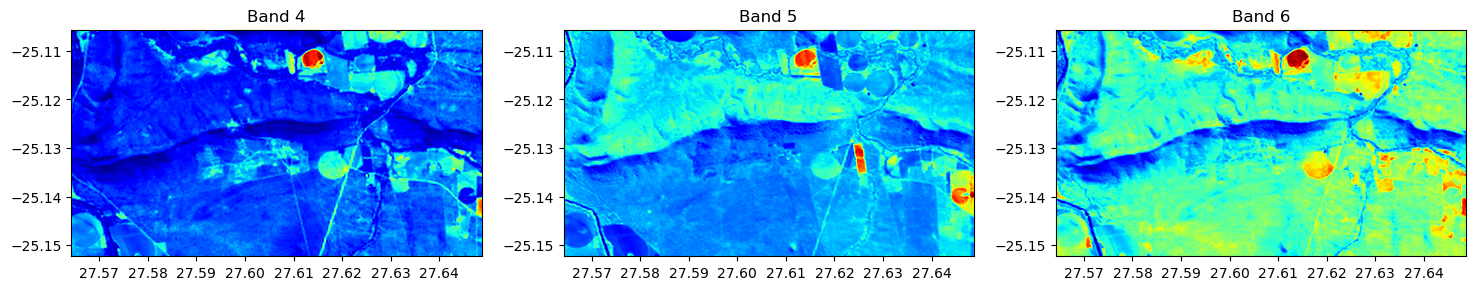

In [17]:
xmin = assen_data['Longitude'].min()
xmax = assen_data['Longitude'].max()
ymin = assen_data['Latitude'].min()
ymax = assen_data['Latitude'].max()

#Extract the reconstructed bands 5, 6, and 7
reconstructed_band4 = assen_data['ReconstructedBand4'].values.reshape(size)
reconstructed_band5 = assen_data['ReconstructedBand5'].values.reshape(size)
reconstructed_band6 =assen_data['ReconstructedBand6'].values.reshape(size)

#Get the range for each reconstructed band
vmin_band4 = np.min(reconstructed_band4)
vmax_band4 = np.max(reconstructed_band4)
vmin_band5 = np.min(reconstructed_band5)
vmax_band5 = np.max(reconstructed_band5)
vmin_band6 = np.min(reconstructed_band6)
vmax_band6 = np.max(reconstructed_band6)

#Plot reconstructed bands
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18, 6)

im_band4 = ax[0].imshow(reconstructed_band4, cmap="jet", vmin=vmin_band4, vmax=vmax_band4,
                        extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
ax[0].set_title('Band 4')

im_band5 = ax[1].imshow(reconstructed_band5, cmap="jet", vmin=vmin_band5, vmax=vmax_band5,
                        extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
ax[1].set_title('Band 5')

im_band6 = ax[2].imshow(reconstructed_band6, cmap="jet", vmin=vmin_band6, vmax=vmax_band6,
                        extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
ax[2].set_title('Band 6')

plt.show()

In [18]:
#lists of similar types of metadata to make referencing the data easier
coord_names = ['Longitude', 'Latitude'] 
bands = ['Band1', 'Band2','Band3', 'Band4', 'Band5', 'Band6', 'Band7']


assen_data['Latitude'] = pd.to_numeric(assen_data['Latitude'], errors='coerce') #convert latitude to numeric values
assen_data['Longitude'] = pd.to_numeric(assen_data['Longitude'], errors='coerce') #convert longitude to numeric values



for band in bands:
    assen_data[band] = np.abs(pd.to_numeric(assen_data[band], errors='coerce')) #make all chemical composition to be numeric

    
assen_data.describe()

Unnamed: 0     Longitude      Latitude         Band1         Band2  \
count  48848.000000  48848.000000  48848.000000  48848.000000  48848.000000   
mean   24423.500000     27.606466    -25.128960    251.722547    316.526327   
std    14101.347312      0.024398      0.013452     94.493587    106.311331   
min        0.000000     27.564250    -25.152291      0.000000     62.000000   
25%    12211.750000     27.585356    -25.140607    186.000000    248.000000   
50%    24423.500000     27.606466    -25.128958    245.000000    312.000000   
75%    36635.250000     27.627580    -25.117309    312.000000    377.000000   
max    48847.000000     27.648697    -25.105620    968.000000   1171.000000   

              Band3         Band4         Band5         Band6         Band7  \
count  48848.000000  48848.000000  48848.000000  48848.000000  48848.000000   
mean     509.547433    609.615419   1648.147539   1801.414490   1216.814609   
std      145.656643    238.682890    446.999961    469.584012    432.462650   
min      149.000000    121.000000    150.000000    141.000000    102.000000   
25%      436.000000    467.000000   1382.000000   1539.000000    937.750000   
50%      498.000000    577.000000   1585.000000   1830.000000   1196.000000   
75%      562.000000    706.000000   1865.000000   2070.000000   1454.000000   
max     1834.000000   2558.000000   5025.000000   4031.000000   3158.000000   

          Residual4     Residual5     Residual6  PredictedResidual4  \
count  4.884800e+04  4.884800e+04  4.884800e+04        4.884800e+04   
mean  -2.872834e-18  4.800178e-18 -1.345504e-18       -2.938568e-07   
std    5.292617e-03  8.339131e-03  4.128519e-03        5.081274e-03   
min   -6.259060e-02 -1.740871e-01 -4.882396e-02       -4.534431e-02   
25%   -3.208100e-03 -4.919168e-03 -2.502487e-03       -3.144561e-03   
50%   -3.258728e-05  5.134503e-05 -2.541979e-05       -2.526337e-05   
75%    3.122060e-03  5.054734e-03  2.435371e-03        3.076244e-03   
max    1.104883e-01  9.861873e-02  8.618668e-02        6.883043e-02   

       PredictedResidual5  PredictedResidual6  ReconstructedBand4  \
count        4.884800e+04        4.884800e+04        48848.000000   
mean         4.439741e-07       -1.315237e-08          609.615419   
std          8.006123e-03        3.963463e-03          238.682606   
min         -1.085861e-01       -3.538843e-02          121.000558   
25%         -4.845153e-03       -2.451424e-03          467.000712   
50%          4.250675e-05       -2.018319e-05          576.990822   
75%          4.953813e-03        2.400315e-03          705.997349   
max          7.193896e-02        5.373324e-02         2557.997663   

       ReconstructedBand5  ReconstructedBand6  
count        48848.000000        48848.000000  
mean          1648.147540         1801.414490  
std            446.997500          469.583938  
min            150.004865          141.002298  
25%           1382.002000         1539.000200  
50%           1585.003313         1829.999292  
75%           1864.990760         2070.008754  
max           5024.955682         4030.998099

In [19]:
r = assen_data['Band4']
g = assen_data['Band3']
b = assen_data['Band2']
B1 = assen_data['Band1']
nir = assen_data['Band5']
SWIR1 = assen_data['Band6']
SWIR2 = assen_data['Band7']


ferrous_minerals_ratio = (SWIR1/nir).values.reshape((172, 284))#High values in band ratio 4/2 are useful to detect the charge transfer absorption related to ferric iron oxides
ferric_iron_oxide = ((r+SWIR1)/nir).values.reshape((172, 284)) # are useful to detect the crystal-field absorption of ferric iron oxide 
clay_minerals_ratio = (SWIR1/SWIR2).values.reshape((172, 284))


#False color Composite (FCC) 753
ndvi = (nir.astype(float)-r.astype(float))/(nir+r) #Normalized Difference Vegetation Index (NDVI)
ndvi = ndvi.values.reshape((172, 284))
ndwi = (nir.astype(float)-g.astype(float))/(nir+g) #Normalized Difference Water Index (NDWI)
ndwi = ndwi.values.reshape((172, 284))
B42  = r/b
B42.values.reshape((172, 284))
B57  = nir/SWIR1 # this should be nir/SWIR2
B57.values.reshape((172, 284))
B54 = nir/r
B54.values.reshape((172, 284))
#Landsat 8 image ratios (4/2, 5/7, 5/4) in RGB recognized the distribution of iron ore (red-yellow color range)


#543 distinguish vegitation
#764 urban area
#Bathymetric (4, 3, 1)
#Geology (7, 6, 2)
#Agriculture (6, 5, 2)
#Short-Wave Infrared (7, 6 4)
#Color Infrared (5, 4, 3)
#Natural Color (4, 3, 2)




'''B1 = "Band 1", 
   B2 = "Blue", 
   B3 = "Green", 
   B4 = "Red",
   B5 = "NIR", 
   B6 = "SWIR1", 
   B7 = "SWIR2"]

'''

'B1 = "Band 1", \n   B2 = "Blue", \n   B3 = "Green", \n   B4 = "Red",\n   B5 = "NIR", \n   B6 = "SWIR1", \n   B7 = "SWIR2"]\n\n'

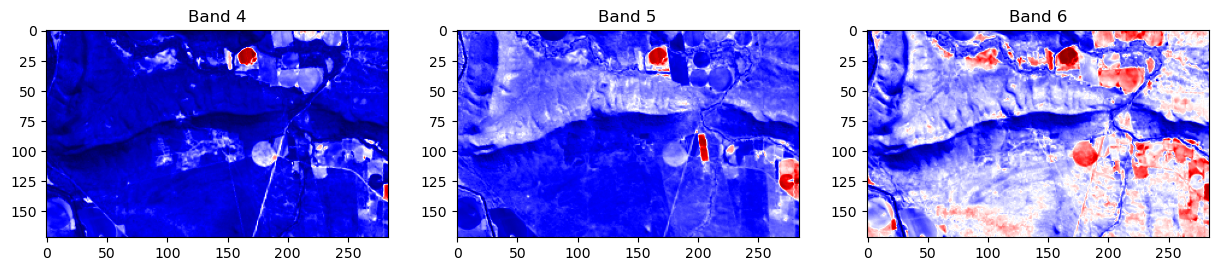

In [20]:
#Define bands
band4 = assen_data['Band4'].values.reshape((172, 284))
band5 = assen_data['Band5'].values.reshape((172, 284))
band6 = assen_data['Band6'].values.reshape((172, 284))
band7 = assen_data['Band7'].values.reshape((172, 284))

#Plot bands 4, 5, and 6
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(band4, cmap='seismic')
axes[0].set_title('Band 4')

axes[1].imshow(band5, cmap='seismic')
axes[1].set_title('Band 5')

axes[2].imshow(band6, cmap='seismic')
axes[2].set_title('Band 6')

plt.show()

#Calculate band ratios
ferrous_minerals_ratio = band6 / band4
ferric_iron_oxide = (band4 + band6) / band5
clay_minerals_ratio = band6 / band7

#Plot band ratio images for ferrous and ferric iron oxides, and clay
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ferrous_minerals_ratio, cmap='seismic')
axes[0].set_title('Ferrous Iron Oxides Ratio')

axes[1].imshow(ferric_iron_oxide, cmap='seismic')
axes[1].set_title('Ferric Iron Oxides Ratio')

axes[2].imshow(clay_minerals_ratio, cmap='seismic')
axes[2].set_title('Clay Minerals Ratio')

plt.show()

Best model for Band4: RandomForest
R2 score for Band4: 0.9789329313546201
Best model for Band5: RandomForest
R2 score for Band5: 0.7716496332199997
Best model for Band6: RandomForest
R2 score for Band6: 0.9298033874026513


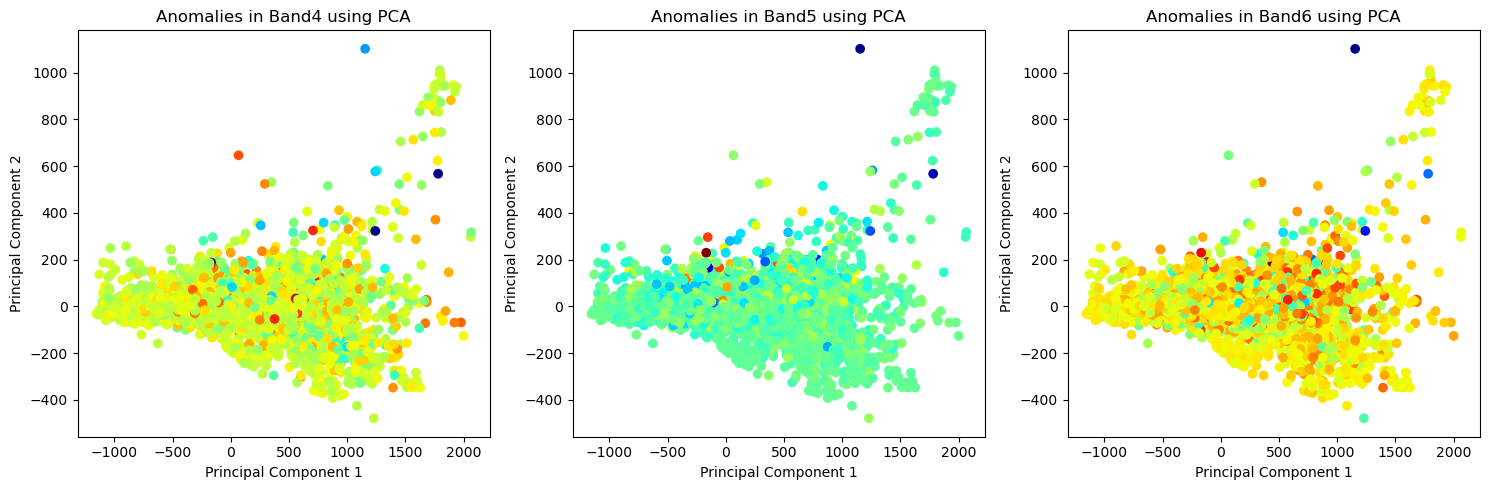

In [21]:
#Define bands and target variables
bands = ['Band4', 'Band5', 'Band6']
target_variables = ['Reconstructed_Band4', 'Reconstructed_Band5', 'Reconstructed_Band6']

#Initialize models
models = {
    'RandomForest': RandomForestRegressor(),
    'kNN': KNeighborsRegressor(),
    'SVM': SVR()
}

#Initialize PCA
pca = PCA(n_components=3)

#Set up subplots
fig, axes = plt.subplots(1, len(bands), figsize=(15, 5))

#Iterate over bands
for i, (band, target_variable) in enumerate(zip(bands, target_variables)):
    #Extract features and target variable
    X = assen_data[['Band1', 'Band2', 'Band3', 'Band7']].values  # Adjust bands as needed
    y = assen_data[band].values

    #Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    best_model = None
    best_score = -np.inf

    #Iterate over models and find the best one
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        mean_score = np.mean(scores)

        if mean_score > best_score:
            best_score = mean_score
            best_model = model_name

    print(f"Best model for {band}: {best_model}")

    #Train the best model on the full training set
    best_model = models[best_model]
    best_model.fit(X_train, y_train)

    #Predict on the test set
    y_pred = best_model.predict(X_test)

    #Evaluate the model
    r2 = r2_score(y_test, y_pred)
    print(f"R2 score for {band}: {r2}")

    #Apply PCA
    X_pca = pca.fit_transform(X_test)

    #Plot the anomalies using PCA
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=y_test - y_pred, cmap='jet')
    axes[i].set_title(f"Anomalies in {band} using PCA")
    axes[i].set_xlabel('Principal Component 1')
    axes[i].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

The RandomForest model consistently outperformed the other models across all three bands, demonstrating its effectiveness in predicting the target variables. The PCA plots visualize anomalies in each band.

## Model Evaluation

The performance of machine learning models was evaluated using the coefficient of determination (CoD) metric. The best models for each band were identified, and their ability to predict residuals was assessed.

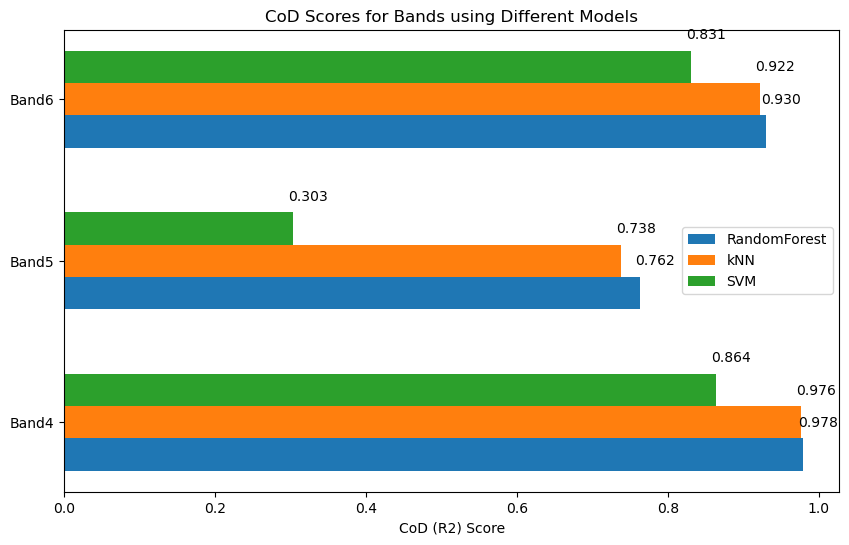

In [22]:
#Initialize arrays to store CoD scores
cod_scores = np.zeros((len(bands), len(models)))

#Iterate over bands
for i, band in enumerate(bands):
    #Extract features and target variable
    X = assen_data[['Band1', 'Band2', 'Band3', 'Band7']].values  
    y = assen_data[band].values

    #Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Iterate over models and find the best one
    for j, (model_name, model) in enumerate(models.items()):
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        mean_score = np.mean(scores)

        cod_scores[i, j] = mean_score

#Plot CoD scores 
fig, ax = plt.subplots(figsize=(10, 6))

for i, band in enumerate(bands):
    for j, (model_name, _) in enumerate(models.items()):
        value = cod_scores[i, j]
        ax.text(value + 0.02, i + j * 0.2, f'{value:.3f}', color='black', ha='center', va='center')

ax.barh(np.arange(len(bands)) - 0.2, cod_scores[:, 0], 0.2, label='RandomForest')
ax.barh(np.arange(len(bands)), cod_scores[:, 1], 0.2, label='kNN')
ax.barh(np.arange(len(bands)) + 0.2, cod_scores[:, 2], 0.2, label='SVM')

ax.set_yticks(np.arange(len(bands)))
ax.set_yticklabels(bands)
ax.set_xlabel('CoD (R2) Score')
ax.set_title('CoD Scores')
ax.legend()

plt.show()

## Best prediction results 

In [23]:
#Define bands and corresponding CoD values
bands = ['Band5', 'Band6', 'Band4']
cod_values = [0.773, 0.930, 0.979]

#Initialize models with parameters from Table 3
models = {
    'RandomForest_Band5': RandomForestRegressor(),
    'RandomForest_Band6': RandomForestRegressor(),
    'RandomForest_Band4': RandomForestRegressor(),
}

#Set up subplots
fig, axes = plt.subplots(1, len(bands), figsize=(15, 5))

#Iterate over bands in the order of increasing CoD
for i, (band, cod_value) in enumerate(sorted(zip(bands, cod_values), key=lambda x: x[1])):
    #Extract features and target variable
    X = assen_data[['Band1', 'Band2', 'Band3', 'Band7']].values  
    y = assen_data[band].values

    #Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Initialize and train the model
    model = models[f'RandomForest_{band}']  
    model.fit(X_train, y_train)

    #Make predictions
    y_pred = model.predict(X_test)

    #Plot Prediction versus Actual
    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
    axes[i].set_title(f'{band}')
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

In [24]:
#Define bands and target variables
bands = ['Band4', 'Band5', 'Band6']
target_variables = ['Reconstructed_Band4', 'Reconstructed_Band5', 'Reconstructed_Band6']

#Initialize models
models = {
    'RandomForest': RandomForestRegressor(),
    'kNN': KNeighborsRegressor(),
    'SVM': SVR()
}

#Initialize PCA
pca = PCA(n_components=3)

#Set up subplots
fig, axes = plt.subplots(3, len(bands) + 1, figsize=(15, 10))

#Iterate over bands
for i, (band, target_variable) in enumerate(zip(bands, target_variables)):
    # Extract features and target variable
    X = assen_data[['Band1', 'Band2', 'Band3', 'Band7']].values  # Adjust bands as needed
    y = assen_data[band].values

    #Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    best_model = None
    best_score = -np.inf

    #Iterate over models and find the best one
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        mean_score = np.mean(scores)

        if mean_score > best_score:
            best_score = mean_score
            best_model = model_name

    print(f"Best model for {band}: {best_model}")

    #Train the best model on the full training set
    best_model = models[best_model]
    best_model.fit(X_train, y_train)

    #Predict on the test set
    y_pred = best_model.predict(X_test)

    #Evaluate the model
    r2 = r2_score(y_test, y_pred)
    print(f"R2 score for {band}: {r2}")

    #Apply PCA
    X_pca = pca.fit_transform(X_test)

    #Plot the anomalies using PCA
    scatter = axes[i, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_test - y_pred, cmap='jet')
    axes[i, 0].set_title(f"Anomalies in {band} using PCA")
    axes[i, 0].set_xlabel('Principal Component 1')
    axes[i, 0].set_ylabel('Principal Component 2')
    axes[i, 0].legend(*scatter.legend_elements(), title='Residuals')

    #Plot the actual versus predicted values
    axes[i, 1].scatter(y_test, y_pred, alpha=0.5)
    axes[i, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
    axes[i, 1].set_title(f'Prediction versus Actual for {band}')
    axes[i, 1].set_xlabel('Actual Values')
    axes[i, 1].set_ylabel('Predicted Values')

    #Plot the residuals
    axes[i, 2].scatter(np.arange(len(y_test)), y_test - y_pred, c='blue', marker='o', label='Residuals')
    axes[i, 2].axhline(0, color='red', linestyle='--', label='Zero Residuals')
    axes[i, 2].set_title(f'Residuals for {band}')
    axes[i, 2].set_xlabel('Sample Index')
    axes[i, 2].set_ylabel('Residuals')
    axes[i, 2].legend()

#Hide empty subplot in the last column
for i in range(len(bands)):
    axes[i, -1].axis('off')

plt.tight_layout()
plt.show()

Best model for Band4: RandomForest
R2 score for Band4: 0.9789735923832821
Best model for Band5: RandomForest
R2 score for Band5: 0.7715679550139252
Best model for Band6: RandomForest
R2 score for Band6: 0.9301742513924373


# Band ratios and remote sensing indices

Various band ratios and remote sensing indices, such as NDVI, were calculated. These ratios contribute to the identification of specific features like vegetation, urban areas, and water bodies.

In [25]:
vmin = np.min(ndvi)
vmax = np.max(ndvi)


fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 8, forward=True)

im =ax.imshow(ndvi, cmap="coolwarm", vmin=vmin, vmax =vmax, 
               extent = [xmin,xmax, ymin,ymax], aspect=1, interpolation = 'lanczos')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.02)
cbar = plt.colorbar(im, cax=cax)

plt.show()

## Visualizations

The reconstructed bands were visualized, showcasing the distribution of anomalies. Anomaly detection maps were generated by plotting the residuals for each band. The analysis emphasized the detection of anomalies in Bands 4, 5, and 6.

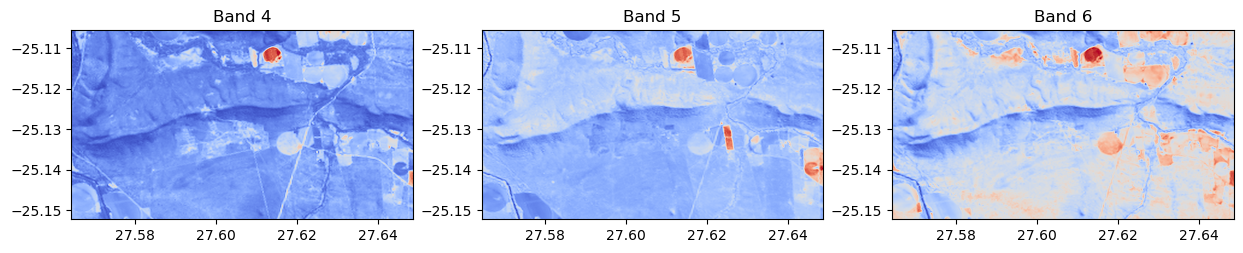

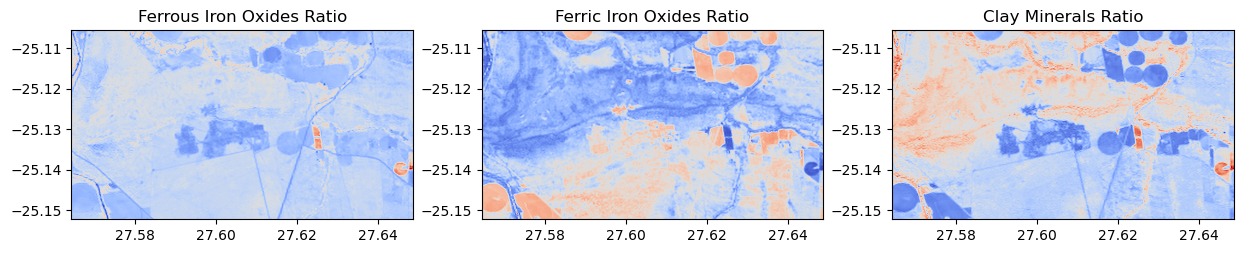

In [26]:
#Define bands
band4 = assen_data['Band4'].values.reshape((172, 284))
band5 = assen_data['Band5'].values.reshape((172, 284))
band6 = assen_data['Band6'].values.reshape((172, 284))
band7 = assen_data['Band7'].values.reshape((172, 284))

#Plot bands 4, 5, and 6
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(band4, cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
axes[0].set_title('Band 4')

axes[1].imshow(band5, cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
axes[1].set_title('Band 5')

axes[2].imshow(band6, cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
axes[2].set_title('Band 6')

plt.show()

#Calculate band ratios
ferrous_minerals_ratio = band6 / band4
ferric_iron_oxide = (band4 + band6) / band5
clay_minerals_ratio = band6 / band7

#Plot band ratio images for ferrous and ferric iron oxides, and clay
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ferrous_minerals_ratio, cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
axes[0].set_title('Ferrous Iron Oxides Ratio')

axes[1].imshow(ferric_iron_oxide, cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
axes[1].set_title('Ferric Iron Oxides Ratio')

axes[2].imshow(clay_minerals_ratio, cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
axes[2].set_title('Clay Minerals Ratio')

plt.show()

## Anomaly Detection Maps

Anomaly detection maps were created by visualizing anomalies in Bands 4, 5, and 6 using color-mapped residuals. This provided a comprehensive view of anomalies across different bands.

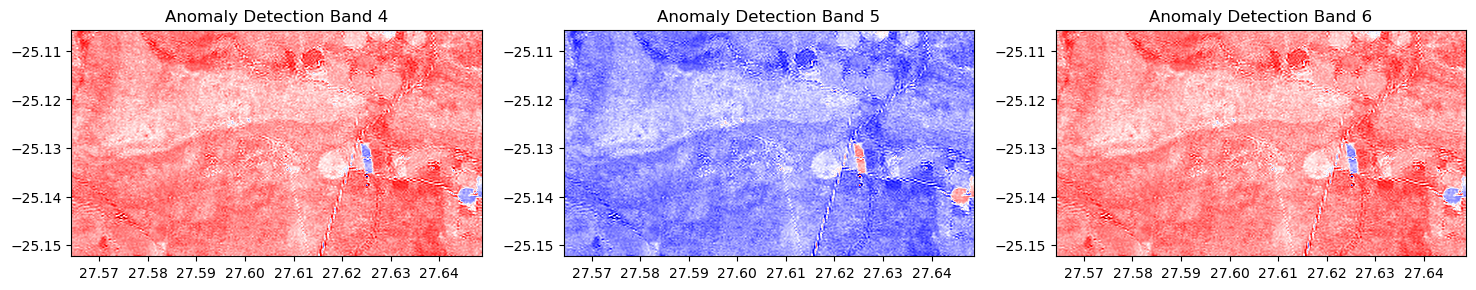

In [27]:
#Extract the original bands for comparison
band4 = assen_data['Band4'].values.reshape(size)
band5 = assen_data['Band5'].values.reshape(size)
band6 = assen_data['Band6'].values.reshape(size)

#Compute residuals for each band
residuals_band4 = band4 - reconstructed_band4
residuals_band5 = band5 - reconstructed_band5
residuals_band6 = band6 - reconstructed_band6

#Get the range for each residual
vmin_residuals_band4 = np.min(residuals_band4)
vmax_residuals_band4 = np.max(residuals_band4)
vmin_residuals_band5 = np.min(residuals_band5)
vmax_residuals_band5 = np.max(residuals_band5)
vmin_residuals_band6 = np.min(residuals_band6)
vmax_residuals_band6 = np.max(residuals_band6)

#Plot anomaly detection maps
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18, 6)

im_residuals_band4 = ax[0].imshow(residuals_band4, cmap="seismic", vmin=vmin_residuals_band4, vmax=vmax_residuals_band4,
                                 extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
ax[0].set_title('Anomaly Detection Band 4')

im_residuals_band5 = ax[1].imshow(residuals_band5, cmap="seismic", vmin=vmin_residuals_band5, vmax=vmax_residuals_band5,
                                 extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
ax[1].set_title('Anomaly Detection Band 5')

im_residuals_band6 = ax[2].imshow(residuals_band6, cmap="seismic", vmin=vmin_residuals_band6, vmax=vmax_residuals_band6,
                                 extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
ax[2].set_title('Anomaly Detection Band 6')

plt.show()

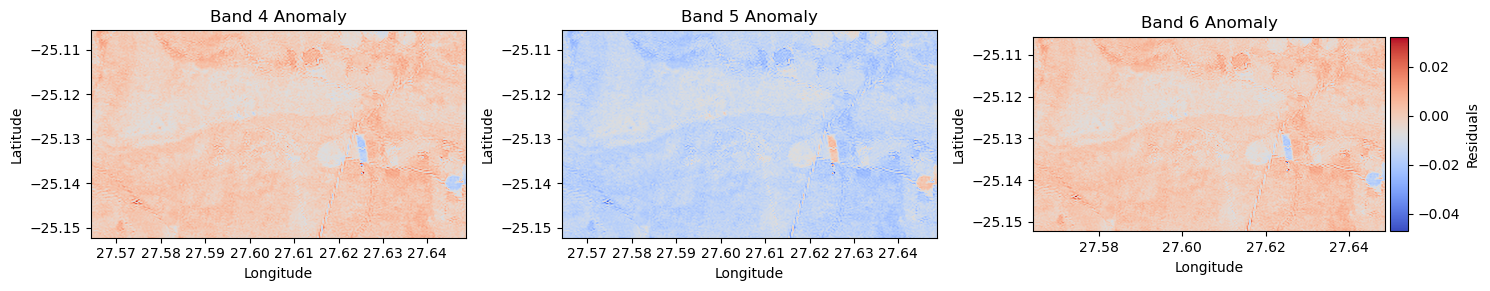

In [40]:
from scipy.ndimage import zoom
#Function to create anomaly maps from prediction residuals
def create_residual_anomaly_maps(residuals_list, size, extent, cmap='seismic', titles=None):
    num_residuals = len(residuals_list)

    #Create subplots
    fig, axes = plt.subplots(1, num_residuals, figsize=(15, 5))

    for i, residuals in enumerate(residuals_list):
        #Reshape residuals to match the size of the input image
        residuals_image = residuals.reshape(size)

        #Interpolate with the Lanczos algorithm
        interpolated_residuals = zoom(residuals_image, 2, order=3)

        #Plot the anomaly map
        im = axes[i].imshow(interpolated_residuals, cmap=cmap, extent=extent, aspect=1, interpolation='lanczos')
        axes[i].set_title(titles[i] if titles else f'Anomaly Map {i + 1}')
        
        #Add colorbar to the last plot
        if i == num_residuals - 1:
            divider = make_axes_locatable(axes[i])
            cax = divider.append_axes("right", size="5%", pad=0.05)
            cbar = plt.colorbar(im, cax=cax)
            cbar.set_label('Residuals')

        axes[i].set_xlabel('Longitude')
        axes[i].set_ylabel('Latitude')

    plt.tight_layout()
    plt.show()

residuals_list = [residuals_band4, residuals_band5, residuals_band6]
titles = ['Band 4 Anomaly', 'Band 5 Anomaly', 'Band 6 Anomaly']
create_residual_anomaly_maps(residuals_list, (172, 284), [xmin, xmax, ymin, ymax], cmap='coolwarm', titles=titles)

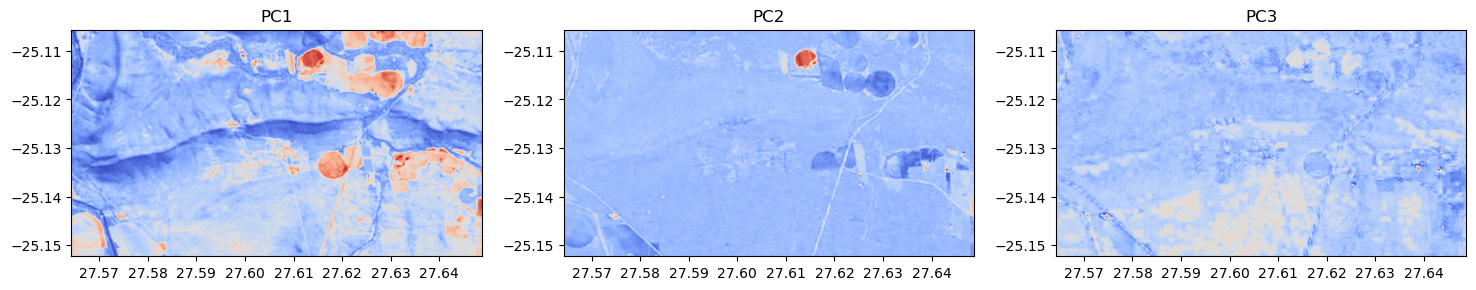

In [51]:
#Extract features for PCA
features_for_pca = ['Band1', 'Band2', 'Band3', 'Band7']
X_pca = assen_data[features_for_pca].values

#Initialize PCA
pca = PCA(n_components=3)

#Fit and transform the data
pca_scores = pca.fit_transform(X_pca)

#Extract PC1, PC2, and PC3 scores
pc1_scores = pca_scores[:, 0].reshape((172, 284))
pc2_scores = pca_scores[:, 1].reshape((172, 284))
pc3_scores = pca_scores[:, 2].reshape((172, 284))

#Plot PC1, PC2, and PC3
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(pc1_scores, cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
axes[0].set_title('PC1')

axes[1].imshow(pc2_scores, cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
axes[1].set_title('PC2')

axes[2].imshow(pc3_scores, cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
axes[2].set_title('PC3')

plt.show()

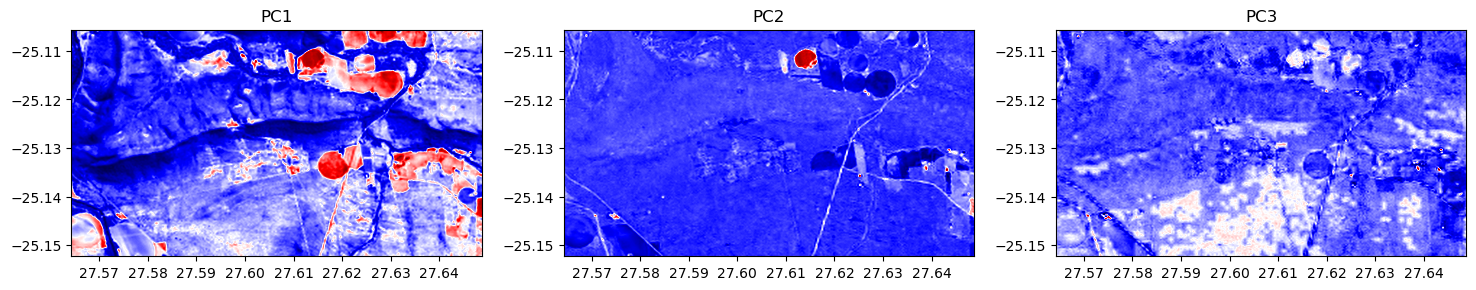

In [53]:
#Plot PC1, PC2, and PC3
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(pc1_scores, cmap='seismic', extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
axes[0].set_title('PC1')

axes[1].imshow(pc2_scores, cmap='seismic', extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
axes[1].set_title('PC2')

axes[2].imshow(pc3_scores, cmap='seismic', extent=[xmin, xmax, ymin, ymax], aspect=1, interpolation='lanczos')
axes[2].set_title('PC3')

plt.show()

# Conclusion

The remote sensing bands reconstructed using various machine learning algorithms and detected anomalies in the reconstructed bands. The incorporation of PCA provided additional insights into the spatial patterns of anomalies. The generated anomaly maps for the bands indicate that there are no significant anomalies present.

# References

1. Nwaila, G.T.; Zhang, S.E.; Bourdeau, J.E.; Ghorbani, Y.; Carranza, E.J.M. Artificial intelligence-based anomaly detection of the Assen iron deposit in South Africa using remote sensing data from the Landsat-8 Operational Land Imager. Artif. Intell. Geosci. 2022, 3, 71–85. https://doi.org/10.1016/j.aiig.2022.10.001